<a href="https://colab.research.google.com/github/jeandata/projetos/blob/main/Modelo_de_risco_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de risco de crédito
Este projeto visa a criação de um modelo para identificar transações fraudulentas utilizando um cartão de crédito.

A base de dados possue os seguintes atributos:  
*   Time: é a identificaçao do tempo.
*   V1-V28: São dados criptografados que provavelmente sofreram o processo de PCA.
*   Amount: Quantia da transação.  
*   Class: Identifica se a transação é fraudulenta ou não.



  




In [ ]:
# Importação de biblioteca
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio Machine Learning/Datasets/creditcard.csv')
dados.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
print(dados.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Levantamento de dados das transações
n_transacoes = dados['Class'].count()
print(f"Número de transações: {n_transacoes}")
n_fraudes = dados['Class'].sum()
fraudes_perc = n_fraudes / n_transacoes
print(f"Número de fraudes: {n_fraudes}, {fraudes_perc:.2%}")
n_normais = n_transacoes - n_fraudes
normais_perc = n_normais / n_transacoes
print(f"Número de transacoes normais: {n_normais}, {normais_perc:.2%}")

Número de transações: 284807
Número de fraudes: 492, 0.17%
Número de transacoes normais: 284315, 99.83%


In [ ]:
# Separando dados em treino e teste
from sklearn.model_selection import StratifiedShuffleSplit

def executar_validador(X, y):
  validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
  for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return X_train, X_test, y_train, y_test


In [ ]:
%%time
from sklearn import tree

def executar_classificador(classificador, X_train, X_test, y_train):
  arvore = classificador.fit(X_train, y_train)
  y_pred = arvore.predict(X_test)
  return y_pred

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20 µs


In [ ]:
import matplotlib.pyplot as plt

def mostrar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(f"{nome}.png")
  plt.close()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def validar_arvore(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(precision_score(y_test, y_pred))
  print(recall_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [ ]:
# Execução do validador
X = dados.drop('Class', axis=1).values
y = dados['Class'].values
X_train, X_test, y_train, y_test = executar_validador(X, y)

In [ ]:
#execucao do classificador DecisionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

In [ ]:
# Criacao da figura
mostrar_arvore(classificador_arvore_decisao, "arvore_decisao")

In [ ]:
# Validar árvore
validar_arvore(y_test, y_pred_arvore_decisao)

0.9989817773252344
0.7
0.7142857142857143
[[28417    15]
 [   14    35]]


##AJUDA PARA ENTENDIMENTO DOS CÁLCULOS
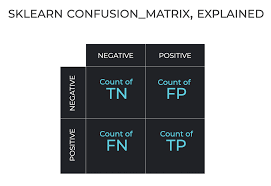

A acurácia:

\begin{align*}
  x &= \dfrac{TP+TN}{TP+TN+FN+FP}
\end{align*}

A precisao:

\begin{align*}
  x &= \dfrac{TP}{FP+TP}
\end{align*}

A recall:

\begin{align*}
  x &= \dfrac{TP}{FN+TP}
\end{align*}



In [ ]:
print(classificador_arvore_decisao.get_depth)


<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier()>


In [ ]:
%%time
# Execução do classificador determinando a profundidade(melhor dos testes)
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

CPU times: user 24.3 s, sys: 22.2 ms, total: 24.3 s
Wall time: 24.5 s


In [ ]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.9994733330992591
0.9473684210526315
0.7346938775510204
[[28430     2]
 [   13    36]]


In [ ]:
# Execução do classificador determinando a profundidade e quantidade de folhas
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

In [ ]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.9993679997191109
0.8604651162790697
0.7551020408163265
[[28426     6]
 [   12    37]]


Verificamos que a parametrização de somente determinar a profundidade é melhor

In [ ]:
# Execução do classificador determinando a profundidade
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

In [ ]:
validar_arvore(y_test, y_pred_arvore_decisao)

0.999403110845827
0.9210526315789473
0.7142857142857143
[[28429     3]
 [   14    35]]


In [ ]:
# Utilizando RandomForest
%%time
from sklearn.ensemble import RandomForestClassifier

classificador_random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
y_pred_arvore_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)

CPU times: user 8min 16s, sys: 537 ms, total: 8min 16s
Wall time: 8min 20s


In [ ]:
mostrar_arvore(classificador_random_forest.estimators_[0], 'random forest1')
mostrar_arvore(classificador_random_forest.estimators_[1], 'random forest1')

In [ ]:
validar_arvore(y_test, y_pred_arvore_forest)

0.9995084442259752
0.9487179487179487
0.7551020408163265
[[28430     2]
 [   12    37]]


In [ ]:
# RandomForest com menos árvores - 50 e profundidade determinada em 10, para reduzir o tempo de processo
%%time
from sklearn.ensemble import RandomForestClassifier

classificador_random_forest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=10)
y_pred_arvore_forest = executar_classificador(classificador_random_forest, X_train, X_test, y_train)


CPU times: user 2min 30s, sys: 145 ms, total: 2min 31s
Wall time: 2min 32s


In [ ]:
validar_arvore(y_test, y_pred_arvore_forest)

0.9995435553526912
0.9736842105263158
0.7551020408163265
[[28431     1]
 [   12    37]]


In [ ]:
# Utilizando Adaboost
%%time
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0)
y_pred_arvore_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

CPU times: user 2min 21s, sys: 99.1 ms, total: 2min 21s
Wall time: 2min 22s


In [ ]:
mostrar_arvore(classificador_adaboost.estimators_[0], 'adaboost1')
mostrar_arvore(classificador_adaboost.estimators_[1], 'adaboost2')

In [ ]:
validar_arvore(y_test, y_pred_arvore_adaboost)

0.9989817773252344
0.7272727272727273
0.6530612244897959
[[28420    12]
 [   17    32]]


In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_arvore_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

CPU times: user 4min 44s, sys: 210 ms, total: 4min 45s
Wall time: 4min 47s


In [ ]:
validar_arvore(y_test, y_pred_arvore_adaboost)

0.9990168884519505
0.723404255319149
0.6938775510204082
[[28419    13]
 [   15    34]]


In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=200)
y_pred_arvore_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

CPU times: user 9min 12s, sys: 359 ms, total: 9min 12s
Wall time: 9min 16s


In [ ]:
validar_arvore(y_test, y_pred_arvore_adaboost)